In [64]:
# importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

#### Precisei salvar o arquivo no padrão utf-8 para tratar alguns caracteres

In [2]:
# Carregando arquivo
base = pd.read_csv('dataset_teste_selecao.csv')

#### Informações básicas da base

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   paciente_id                               576 non-null    object 
 1   coriza                                    576 non-null    object 
 2   tosse_seca_ou_produtiva                   576 non-null    object 
 3   calafrios                                 576 non-null    object 
 4   febre                                     576 non-null    object 
 5   dispneia                                  576 non-null    object 
 6   fadiga                                    576 non-null    object 
 7   anorexia                                  576 non-null    object 
 8   mialgia                                   576 non-null    object 
 9   astenia                                   576 non-null    object 
 10  dor_de_garganta                       

#### Considerações sobre a base

576 registros

65 características (8 numéricas e 57 categóricas)


#### Estatísticas básicas da base

In [4]:
base.describe()

,tempo_vmi_total,tempo_uti_total,tempo_internacao,tempo_referencia_internacao,latitude,longitude,idade,tempo_sintomas_internacao
count,229.000000,385.000000,573.000000,535.000000,371.000000,371.000000,575.000000,538.000000
mean,8.524017,6.722078,7.104712,3.728972,-3.777377,-38.552241,58.351304,10.905204
std,7.288274,5.998104,5.738125,3.014851,0.038545,0.045012,14.326764,4.434116
min,0.000000,0.000000,0.000000,0.000000,-3.860600,-38.626754,20.000000,-13.000000
25%,3.000000,2.000000,3.000000,2.000000,-3.812151,-38.589466,49.000000,8.000000
50%,7.000000,5.000000,5.000000,3.000000,-3.774901,-38.565591,60.000000,10.000000
75%,11.000000,9.000000,9.000000,5.000000,-3.752511,-38.513685,70.000000,13.000000
max,40.000000,34.000000,37.000000,18.000000,-3.703915,-38.428188,90.000000,26.000000


#### Considerações sobre as informações numéricas

Levando em consideração os dados apresentados para o tempo vmi, tempo uti, tempo internação e tempo referência o desfio padrão está bem proxímo do valor da mediana, isso pode considerar caracterizar com a presença de valores discrepantes.

As características latitude e longitude serão utilizadas para apresentar esses dados geolocalizados.

Na base apresenta pacientes com idades diferentes entre 20 à 90 anos

Para o tempo de sintomas à internação  há existência de números negativos isso pode ser considerado como dado errado já que nesse contexto não é possível a existência de números negativos.

## Foco da análise

Toda análise será direcionada para entender os comportamentos que envolvem os defechos da base e montar um dataset sem outliers para treinar os modelos de machine learning para predição de desfechos.

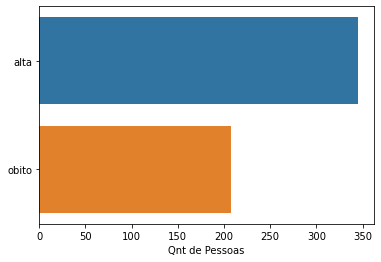

In [5]:
# Distribuição entre os desfechos
sns.countplot(y = 'desfecho',
              data = base,
              order = base['desfecho'].value_counts()[:10].index)
plt.ylabel('')
plt.xlabel('Qnt de Pessoas')
plt.show()

In [6]:
# Quantitativo dos defechos
base['desfecho'].value_counts()

alta     345
obito    208
Name: desfecho, dtype: int64

#### Considerações obre o quantitativo dos defechos

Nesse caso é um quantitativo considerável para a categoria alta, na contrução de modelos preditivos, pode-se existir uma rápida aprendizagem para essa categoria sendo a que possui mais amostras.

## Histogramas

Serão usados apenas nas características númericas, com a exclusão das características latitude e logintude que são destinadas para o uso da geolocalização dos pacientes.  

### tempo_vmi_total

<AxesSubplot:xlabel='tempo_vmi_total', ylabel='Density'>

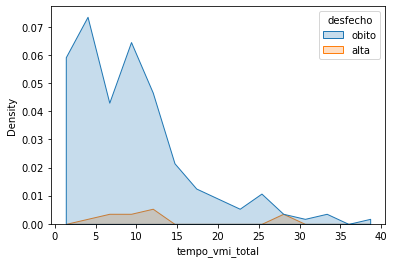

In [7]:
sns.histplot(data=base, x ='tempo_vmi_total',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_vmi_total

Existe uma densidade muito alta nos pacientes que tiveram desfecho óbito nos 5 primeiros dias de vmi e um outra concentração até os 10 dias de vmi, em comparação com os pacientes que obtiveram alta essa densidade ganha destaque. 

### tempo_uti_total

<AxesSubplot:xlabel='tempo_uti_total', ylabel='Density'>

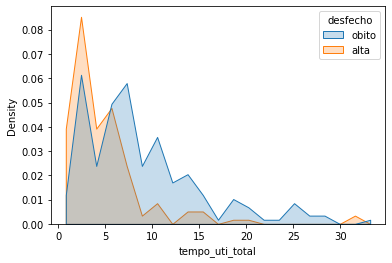

In [8]:
sns.histplot(data=base, x ='tempo_uti_total',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_uti_total

Até o 4º dia na unidade de terapia intensiva os pacientes que obtiveram desfecho alta possui a maior densidade nesse grupo, comparado com os pacientes que obtiveram óbito no mesmo período.

A partir do 5º dia na unidade de terapia intensiva apresenta maior densidade os pacientes que obtiveram óbito, isso pode destacar que mais de 5 dias na uti em sua grande maioria as chances de alta são menores.

Nesse histograma é possível identificar alguns outliers, pacientes que tiveram alta com mais de 30 dias na uti.

### tempo_internacao

<AxesSubplot:xlabel='tempo_internacao', ylabel='Density'>

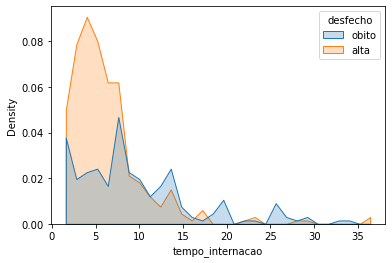

In [9]:
sns.histplot(data=base, x ='tempo_internacao',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_internacao

Analisando o hitograma, há uma concentração de densidade tanto para os pacientes com desfecho alta e óbito até 10º dia de internação.

Levando em conta que os pacientes que obtiveram o desfecho alta estão em maior densidade nesse intervalo de tempo, para os demais dias de internação a predominância é dos pacientes que chegaram ao óbito.

### tempo_referencia_internacao

<AxesSubplot:xlabel='tempo_referencia_internacao', ylabel='Density'>

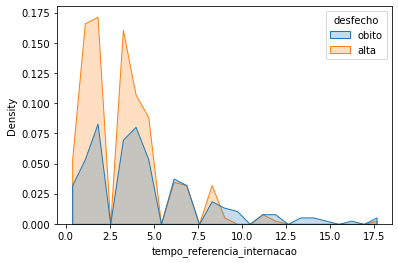

In [10]:
sns.histplot(data=base, x ='tempo_referencia_internacao',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_referencia_internacao

O comportamento da densidade do tempo de referência para a internação dos pacientes estão com alta e óbito estão bem próximos, mas vale destacar que os pacientes que tiveram referência até internação de 2 dias obtiveram maior frequência de alta comparado com os pacientes que tiveram desfecho óbito.

### idade

<AxesSubplot:xlabel='idade', ylabel='Density'>

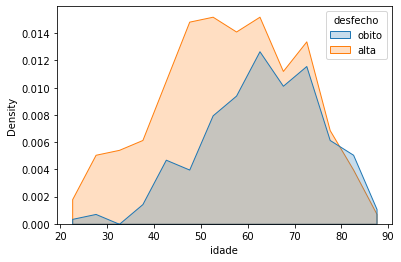

In [11]:
sns.histplot(data=base, x ='idade',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_referencia_internacao

é importante destacar que houve óbito em todas as faixas etárias, porém, os pacientes que tiveram desfecho de óbito teve uma maior frequência a partir dos 40 anos de idade, isso não é um fator determinante, mas combinado com outras características pode identificar um padrão.

### tempo_sintomas_internacao

<AxesSubplot:xlabel='tempo_sintomas_internacao', ylabel='Density'>

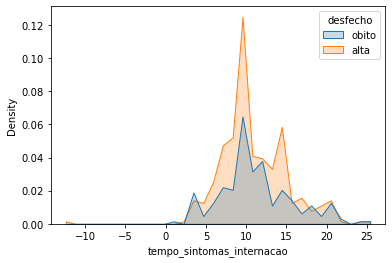

In [12]:
sns.histplot(data=base, x ='tempo_sintomas_internacao',hue='desfecho', stat="density", element="poly")

#### Considerações sobre o histograma tempo_sintomas_internacao

Como já identificado na tabela base estatítica existem alguns números negativos, nesse contexto, não há existência real desse cenário, isso pode ser considerado como registros a serem removidos do estudo.

A densidade está mais perceptível entre 7 a 11 dias aproximadamente para ambos os desfechos.

## Boxplots

Serão usados apenas nas características númericas, com a exclusão das características latitude e logintude que são destinadas para o uso da geolocalização dos pacientes. Os boxplots serão utilizados para identificar com facilidade até que ponto os dados estão distribuídos normalmente e quais os outliers para cada desfecho.

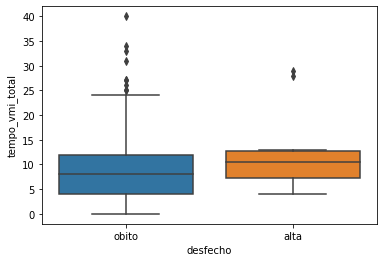

In [13]:
ax = sns.boxplot(x='desfecho', y='tempo_vmi_total',data=base)

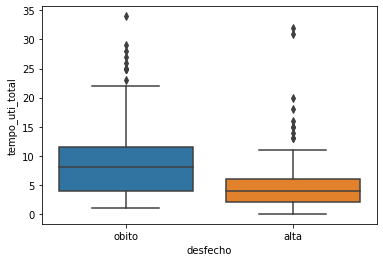

In [14]:
ax = sns.boxplot(x='desfecho', y='tempo_uti_total',data=base)

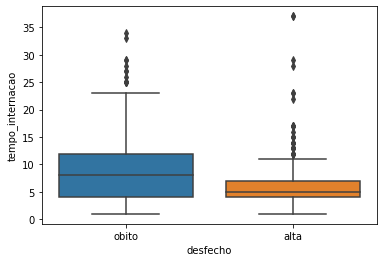

In [15]:
ax = sns.boxplot(x='desfecho', y='tempo_internacao',data=base)

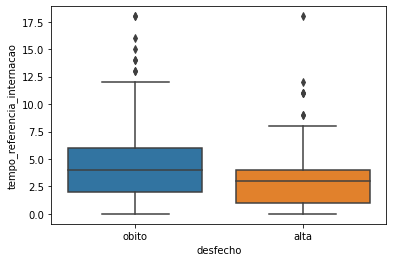

In [16]:
ax = sns.boxplot(x='desfecho', y='tempo_referencia_internacao',data=base)

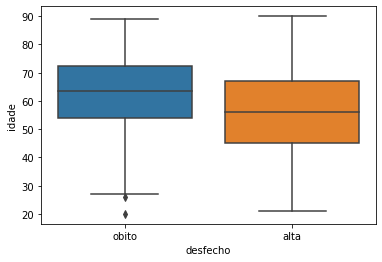

In [17]:
ax = sns.boxplot(x='desfecho', y='idade',data=base)

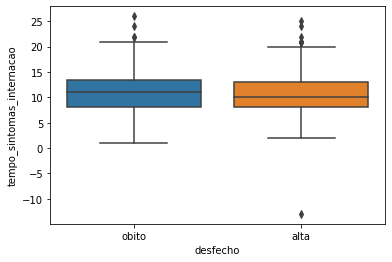

In [18]:
ax = sns.boxplot(x='desfecho', y='tempo_sintomas_internacao',data=base)

#### Considerações sobre os boxplots

Existem outliers presentes em todas as características númericas, os mesmos serão removidos para construção de um dataset sem ruídos, porém, vale destacar que existem estudos que aplicam técnicas para compreender melhor apenas os outliers, mas esse não será nosso caso. 

Um outro ponto importante é que para todos as características númericas os valores de mínimo, mediana, média e máxima são distintos.

#### REMOVENDO OUTLIERS

In [42]:
alta = base.loc[base.desfecho == 'alta']
obito = base.loc[base.desfecho == 'obito']
 
# Removendo amostras discrepantes tempo_vmi_total
alta = alta[alta.tempo_vmi_total < 14 ]
obito = obito[obito.tempo_vmi_total < 25 ]

# Removendo amostras discrepantes tempo_uti_total
alta = alta[alta.tempo_uti_total < 11 ]
obito = obito[obito.tempo_uti_total < 23 ]

# Removendo amostras discrepantes tempo_internacao
alta = alta[alta.tempo_internacao < 11 ]
obito = obito[obito.tempo_internacao < 24 ]

# Removendo amostras discrepantes tempo_referencia_internacao
alta = alta[alta.tempo_referencia_internacao < 8 ]
obito = obito[obito.tempo_referencia_internacao < 12 ]

# Removendo amostras discrepantes idade
obito = obito[obito.idade >= 28 ]

# Removendo amostras discrepantes tempo_sintomas_internacao
alta = alta[alta.tempo_sintomas_internacao < 21 ]
obito = obito[obito.tempo_sintomas_internacao < 20 ]
alta = alta[alta.tempo_sintomas_internacao >= 0 ]

In [43]:
# concatenando as bases
df = pd.concat([alta, obito])

## Dispersão

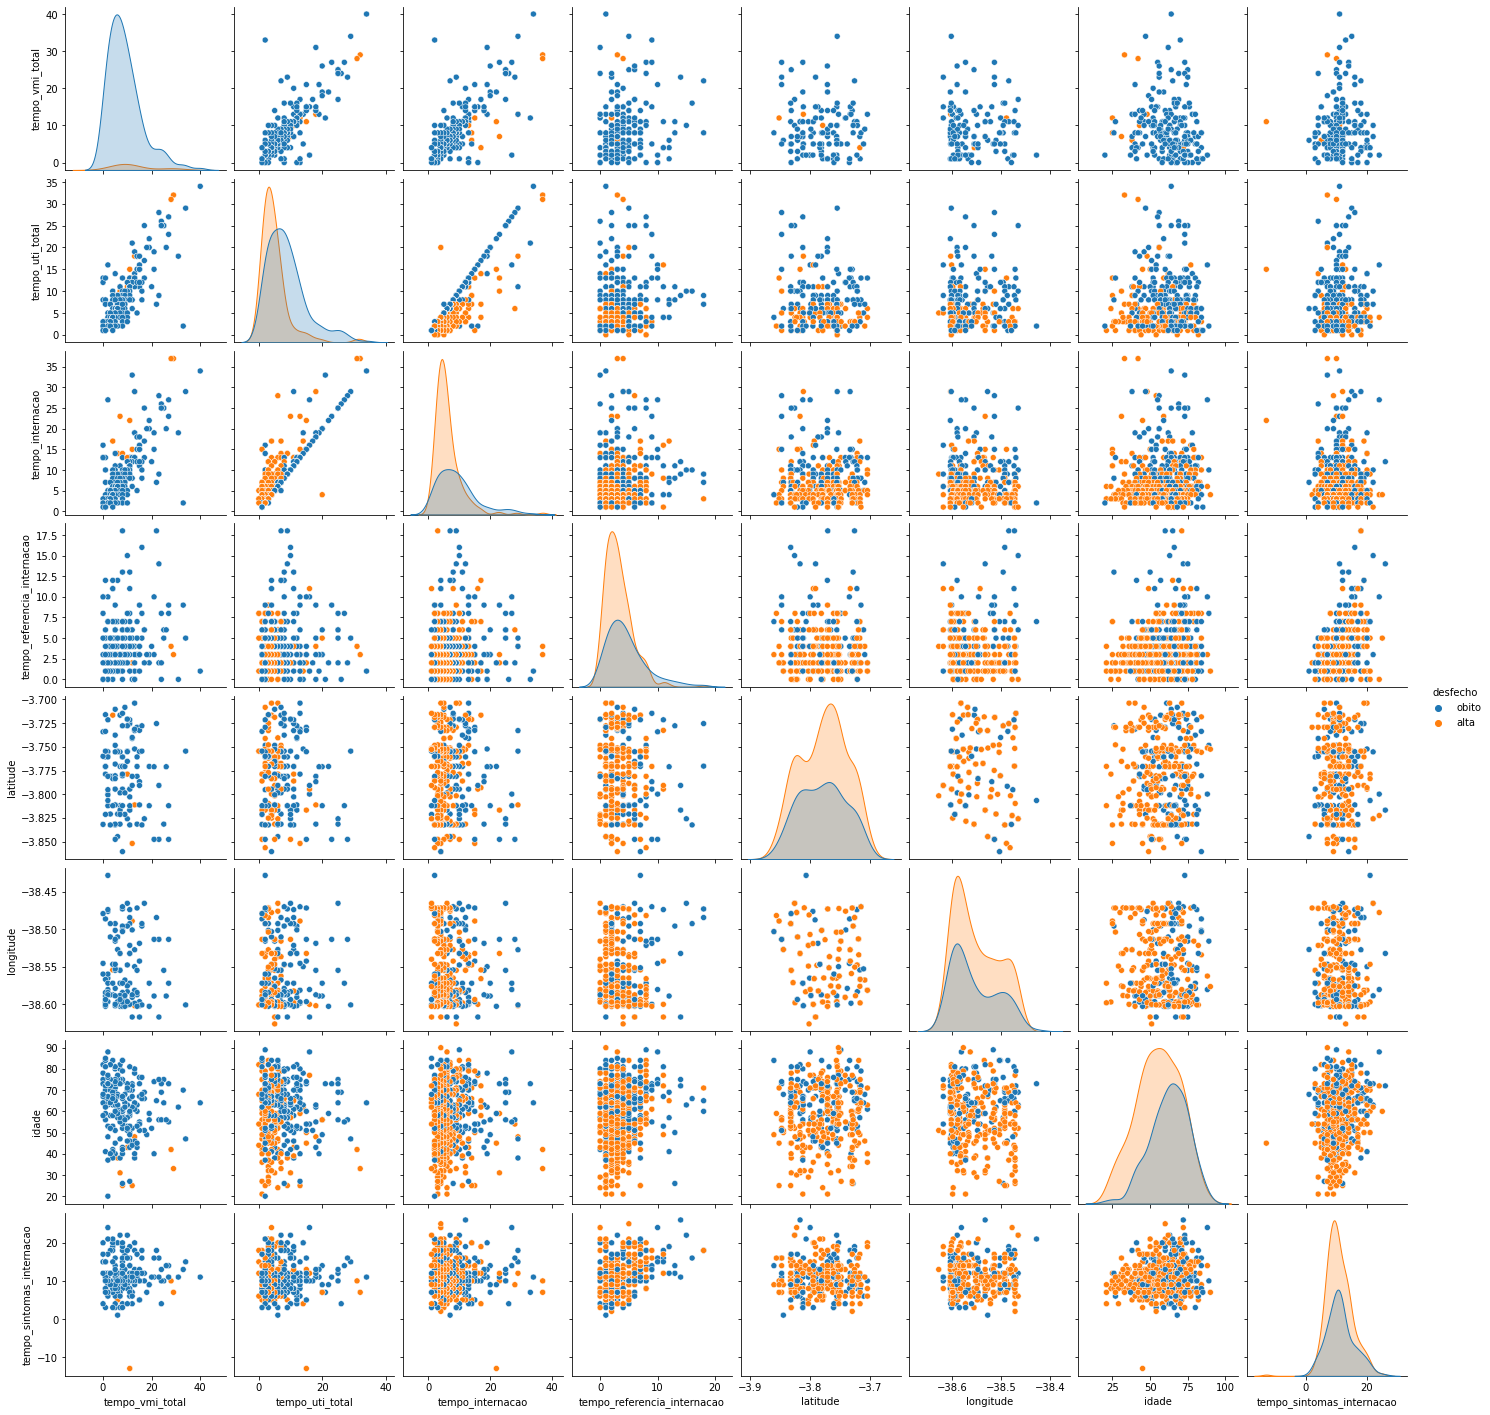

In [22]:
sns.pairplot(base, hue="desfecho")

#### Considerações sobre o gráfico de dispersão

Pode-se observar que entre todas as características a única que consegue separar de forma mais distinta entre as demais é o tempo de vmi total com outra características, as demais existe um grupo bem pequeno, mas acredito que não seja suficiente para representar o grupo como todo.

Um outro ponto que pode ser observado é analisando em uma dimensão tridimensional ou n-dimensional para obter outros insights.

## Alguns questionamentos

#### O grupo em estudo é predominado por pacientes do sexo feminino?

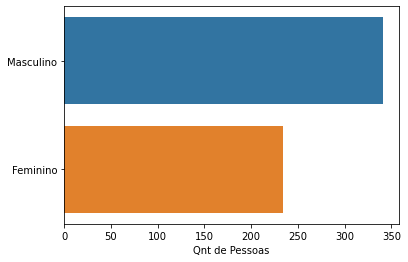

In [23]:
sns.countplot(y = 'sexo',
              data = base,
              order = base['sexo'].value_counts()[:10].index)
plt.ylabel('')
plt.xlabel('Qnt de Pessoas')
plt.show()

#### Qual a região mais frequente dos pacientes?

In [88]:
locais = base[['latitude','longitude']]
locais = locais.dropna()

lat = locais.latitude.tolist()
lng = locais.longitude.tolist()

m = folium.Map(
    location=[-3.7760590840177954, -38.54398612807878],
    zoom_start=12
)

HeatMap(list(zip(lat, lng))).add_to(m)

m

#### Considerações sobre a localicação dos pacientes

No mapa é possível observar que as regiões dos bairros Autran Nunes, Conjunto Ceará, Granja Portugal, Conjunto Esperança, Messejana e Vicente Pizon aparecem como áreas mais afetadas aos casos de COVID, porém, não deve desconsiderar as demais regiões.

## CONSIDERAÇÕES FINAIS

Existem muitas possibilidades de análises com esse conjunto de dados, dentre eles é possível analisar por grupos:

- Sociodemográficos
- Sintomas
- Antecedentes pessoais/Comorbidades
- Complicações
- Uso de Oxigenio

Além disso é possível refazer essa análise separando-a entre algumas simulações:

- Utilizando os dados na sua distribuição normal
- Usando apenas os outliers
- Realiando estudo por pacientes dos mesmos bairros.

Sobre a construção de modelos de aprendizagem de máquina é possível:

- Construir um modelo preditivo de desfechos usando as demais características
- Construir modelo de preditivo para óbito na vmi
- Regressão logística para as características de tempo, sendo possível construir uma para cada.
